In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_models = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2809"
path_metrics = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2809_log_files"

***
# Examinate the Loss :

In [2]:
def make_table(log_file) :
    import pandas as pd
    lines_data = [line for line in open(log_file).read().split("\n") if line[0:6] == "Epoch:" if len(line.split("\t")) == 6] # if len(line.split("\t")) == 6*
    lines_split = [line.split("\t") for line in lines_data]
    df_raw = pd.DataFrame(lines_split , columns = ["Epoch","Train_loss","Test_loss","MCC","AUC","Acc"])
    df = df_raw.applymap(lambda x: float(x.split(":")[1]))
    df.set_index("Epoch", inplace = True)
    return df
    
def plot_loss(df) : 
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Train_loss'], label='train loss', marker='o', linestyle='-', color ="red")
    plt.plot(df.index, df['Test_loss'], label='test loss', marker='s', linestyle='--', color = "blue")
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)   
    plt.show()  
    

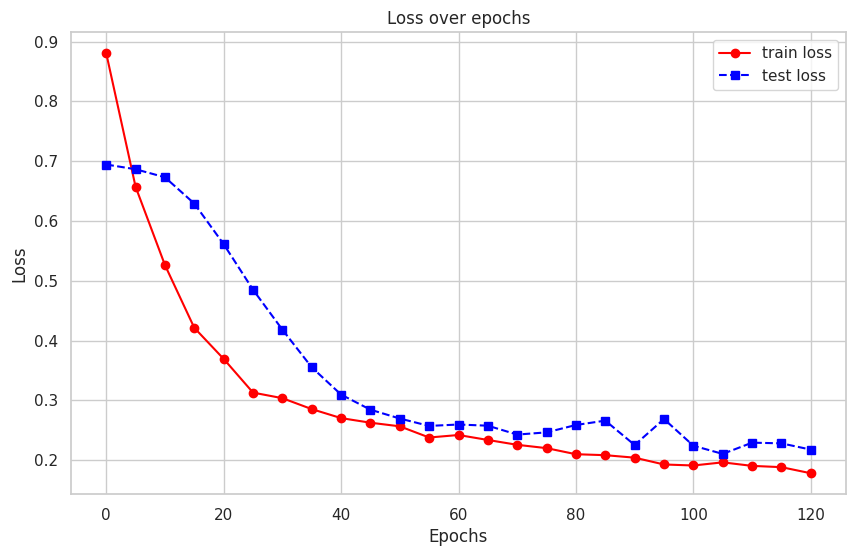

In [6]:
eg_df = make_table(f"{path_metrics}/KL102__node_classification.2805.log")
plot_loss(eg_df)

***
# Make clean table : 

In [72]:
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_models}/Metric_Report.2809.tsv", sep = "\t", names = metrics_names)

df_metrics_sorted = df_metrics.sort_values(by='KL_type')
df_metrics_sorted.reset_index(drop=True, inplace=True)


In [78]:
for col in df_metrics_sorted.columns : 
    if col not in ["KL_type","n_prophages"] : 
        df_metrics_sorted[col] = round(df_metrics_sorted[col] , 4)

,KL_type,n_prophages,F1_score,precision,recall,MCC,Accuracy,AUC
0,KL1,166,0.593,0.727,0.500,0.543,0.889,0.909
1,KL10,101,0.727,0.667,0.800,0.671,0.900,0.898
2,KL102,269,0.960,1.000,0.923,0.954,0.988,0.998
3,KL105,123,0.759,0.647,0.917,0.718,0.904,0.958
4,KL106,463,0.761,0.761,0.761,0.713,0.921,0.965
...,...,...,...,...,...,...,...,...
63,KL70,30,0.546,0.375,1.000,0.500,0.722,0.822
64,KL74,78,0.500,0.385,0.714,0.406,0.783,0.839
65,KL8,22,0.250,0.167,0.500,0.033,0.538,0.773
66,KL81,43,0.364,0.286,0.500,0.214,0.720,0.702


In [79]:
df_metrics_sorted.to_csv(f"{path_models}/Metric_Report.2809.clean.tsv", sep = "\t", index = False, )